# Import Modules


In [4]:
#  import the necessary libraries
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
## following modules from the Plotly: 1) make_subplots , graph_objects
import datetime
from prophet import Prophet 
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error

#  Load the Dataset

In [6]:
# load and print the dataset
try:
    dataet = pd.read_csv('TWITTER.csv')
except :
    print("error in loading the data")

print(dataet.iloc[: , 1:5])
#descriptive statistics
dataet.describe
#check missing values
dataet.isnull().values.any() 

           Open       High        Low      Close
0     45.099998  50.090000  44.000000  44.900002
1     45.930000  46.939999  40.689999  41.650002
2     40.500000  43.000000  39.400002  42.900002
3     43.660000  43.779999  41.830002  41.900002
4     41.029999  42.869999  40.759998  42.599998
...         ...        ...        ...        ...
2167  37.320000  38.049999  37.020000  37.779999
2168  38.189999  39.080002  37.660000  38.910000
2169  38.570000  39.340000  38.410000  38.529999
2170  38.759998  39.080002  38.250000  38.680000
2171  39.009998  39.919998  38.869999  39.410000

[2172 rows x 4 columns]


False

In [7]:
# perform a basic statistical analysis
dataet.describe()

Open         High          Low        Close    Adj Close  \
count  2172.000000  2172.000000  2172.000000  2172.000000  2172.000000   
mean     35.759811    36.435994    35.069503    35.732063    35.732063   
std      14.305437    14.562577    14.003070    14.269980    14.269980   
min      13.950000    14.220000    13.730000    14.010000    14.010000   
25%      24.822500    25.549999    24.129999    24.862501    24.862501   
50%      34.900002    35.430000    34.295000    34.754999    34.754999   
75%      44.209999    45.095000    43.230000    44.132500    44.132500   
max      78.360001    80.750000    76.050003    77.629997    77.629997   

             Volume  
count  2.172000e+03  
mean   2.191115e+07  
std    1.907344e+07  
min    3.661100e+06  
25%    1.258305e+07  
50%    1.713035e+07  
75%    2.430645e+07  
max    2.684654e+08

In [8]:
# print a concise summary of the dataframe
dataet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2172 non-null   object 
 1   Open       2172 non-null   float64
 2   High       2172 non-null   float64
 3   Low        2172 non-null   float64
 4   Close      2172 non-null   float64
 5   Adj Close  2172 non-null   float64
 6   Volume     2172 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 118.9+ KB


In [9]:
# change the Date column type to datetime
dataet["Date"] = pd.to_datetime(dataet['Date'])

# Plot the Dataset

In [10]:
# create the subplots
columns = dataet.columns[1:]
fig = make_subplots(rows = 3 , cols = 2, subplot_titles = columns)
for idx , column in enumerate(columns):
    row = idx//2 +1
    col = idx% 2 + 1
    fig.add_trace(go.Scatter( x = dataet['Date'] , y = dataet[column]), row = row , col = col)
fig.update_layout(height= 1500 , width = 1000, title_text = "Twitter Data", showlegend = False)
fig.show()

# Comparison of Volumes for Each Year


In [11]:
# create the pie chart

# extract the day, month, and year components

dataet['year'] = dataet['Date'].dt.year

# show the modified data frame
#print(df)
dataset = dataet.groupby('year')['Volume'].sum()

dataset

year
2013     845516300
2014    5857904100
2015    5361488600
2016    6479293700
2017    4410743500
2018    7155865200
2019    3880460600
2020    4963890300
2021    4246261600
2022    4389602500
Name: Volume, dtype: int64

In [12]:
layout = {
    'title': 'Pie Chart for Sum of Volume Data against Each Year'}

fig = go.Figure(data=[go.Pie(labels=dataset.index, values=dataset.values, textinfo='label')], layout=layout)
fig.show()

#  Create an OHLC Chart

In [13]:
# create the OHLC chart

# closing price is higher than the open price for a specific date represent it by green otherwise by red

# import plotly.express as px
# fig = px.line(x= dataet['Date'], y= dataet['Close'], color= 'green', title='Life expectancy in Canada')
data = go.Ohlc(x=dataet['Date'],
                open=dataet['Open'],
                high=dataet['High'],
                low=dataet['Low'],
                close=dataet['Close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

In [14]:
layout = {
    'title': 'Twitter Stocks',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2015-10-05', 'x1': '2015-10-05',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
        },
        {
        'x0': '2020-03-15', 'x1': '2020-03-15',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }
    ],
    'annotations': [{
        'x': '2015-10-05', 'y': 0.6, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Jack Dorsey becomes CEO of Twitter.'
        },
        {
        'x': '2020-03-15', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Lockdown started in USA due to Covid19.'
    }
    ]
}

 


In [15]:
fig = go.Figure(data=[data], layout=layout)
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

# Take a Closer Look at OHLC Chart


In [16]:
after_covid = dataet.loc[dataet['Date'] > '2020-03-15']
max_value = after_covid.iloc[:, 1:-2].max().max()

g = after_covid.groupby(["Date"])

monthly_averages = g.aggregate({"Open": np.mean, "High": np.mean, "Low": np.mean, "Close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

trace = go.Candlestick(x=monthly_averages['Date'],
                       open=monthly_averages['Open'].values.tolist(),
                       high=monthly_averages['High'].values.tolist(),
                       low=monthly_averages['Low'].values.tolist(),
                       close=monthly_averages['Close'].values.tolist(),
                      increasing=dict(line=dict(color= 'red')),
                decreasing=dict(line=dict(color= 'lightgreen')))

layout = {
    'title': 'Twitter Stocks <br> <i> After Covid </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': 0, 'x1': 1,
        'y0': max_value, 'y1': max_value, 'xref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
        }],
    'annotations': [{
        'x': '2020-03-15', 'y': 0.95, 'xref': 'x', 'yref': 'paper',
        'showarrow': False,
        'text': 'Peak Value = %f' %max_value
    }]
}

data = [trace]

fig = go.Figure(data=data, layout=layout)
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()



In [17]:
# create the candlestick chart
data = go.Candlestick( x = dataet['Date'] , open = dataet['Open'], close = dataet['Close'] , high = dataet['High'] , low = dataet['Low'], increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

high_open = dataet['Open'].max()
high_close = dataet['Close'].max()
#high_open_time = dataset.at[dataet['Open'].idxmax() , 'Date']
#high_close_time = dataset.at[dataet['Close'].idxmax(), 'Date']


layout = {
    'title' : 'Candlestick graph',
    'xaxis' :{'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis' : {'title': 'Stock'},
    'shapes' : [{
        'x0' : 0,
        'y0' : high_open,
        'x1' : 1,
        'y1' : high_open,
        'xref': 'paper', 'yref': 'y',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    },
    {
        'x0' : 0,
        'y0' : high_close,
        'x1' : 1,
        'y1' : high_close,
        'xref': 'paper', 'yref': 'y',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }]
     
}
fig = go.Figure(data=[data], layout=layout)
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()




#  Visualizing Moving Average


In [18]:
# plot the moving average along with the close price

closeprices = dataet['Close']

dataet['day_10_prices'] = dataet['Close'].rolling(10).mean()
dataet['day_50_prices'] = dataet['Close'].rolling(50).mean()
dataet['day_200_prices'] = dataet['Close'].rolling(200).mean()

dataet.head(20)


colors = ['#ffF500', '#E6a1cf', '#6E6E6E']
avgs = ['day_10_prices', 'day_50_prices', 'day_200_prices']

fig = make_subplots()

fig.append_trace({'x': dataet["Date"], 'y': dataet['Close'], 'type': 'scatter', 'name': 'Close', 'line': {'color': 'green'}}, 1, 1)

for col, c in zip(avgs, colors):
    fig.append_trace({'x': dataet["Date"], 'y': dataet[col], 'type': 'scatter', 'name': col, 'line': {'color': c}}, 1, 1)

fig['layout'].update(height=800, title='Relationship between MAs and Closing Price')
    
fig.show()

# Predict Future Stocks


In [20]:
# create a new dataframe for training
from sklearn.model_selection import train_test_split
df = pd.read_csv('TWITTER.csv')
df.drop(['Open', 'High', 'Low',  'Adj Close', 'Volume'], axis =1, inplace= True)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

Date      Close
0 2013-11-07  44.900002
1 2013-11-08  41.650002
2 2013-11-11  42.900002
3 2013-11-12  41.900002
4 2013-11-13  42.599998

In [21]:
# train the dataset
df = df.rename(columns = {'Date':'ds' , 'Close':'y'})

In [22]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [23]:
model = Prophet()
model.fit(df)
# make the predictions

#create future dates
future = model.make_future_dataframe(periods = 365 , freq = 'D')
#predict prices

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower' , 'yhat_upper']].tail()

22:18:21 - cmdstanpy - INFO - Chain [1] start processing
22:18:21 - cmdstanpy - INFO - Chain [1] done processing


ds       yhat  yhat_lower  yhat_upper
2532 2023-06-20  51.581695   40.646555   62.907525
2533 2023-06-21  51.652645   40.772633   62.720329
2534 2023-06-22  51.852276   40.743057   62.722110
2535 2023-06-23  51.980207   41.057114   63.165958
2536 2023-06-24  46.984284   35.647544   58.239487

# Plot the Predicted Values


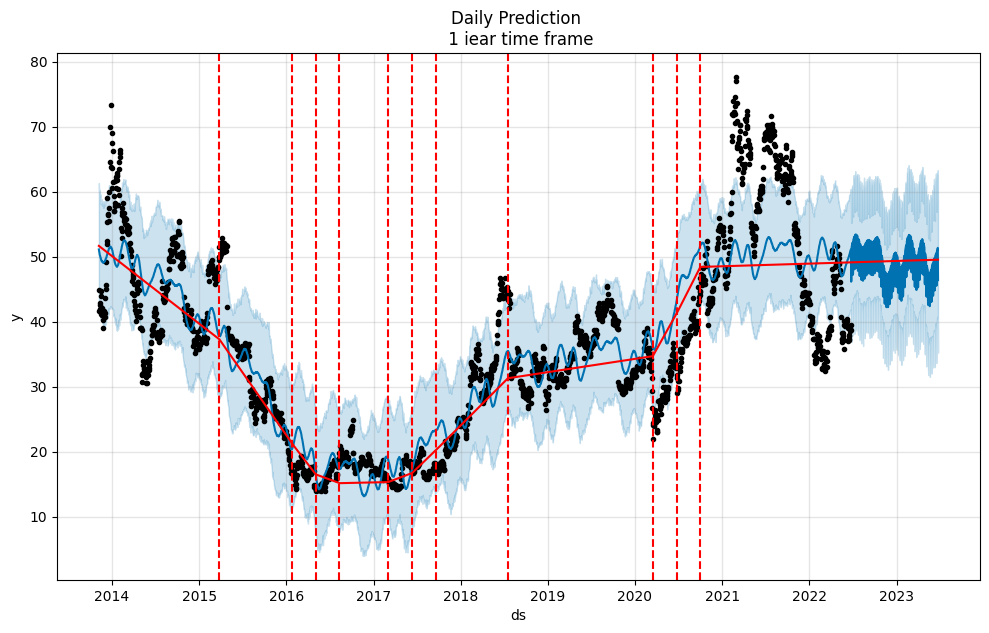

In [33]:
# plot the predicted data lines
fig1 = model.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), model , forecast)
plt.title("Daily Prediction \n 1 iear time frame")
plt.show()

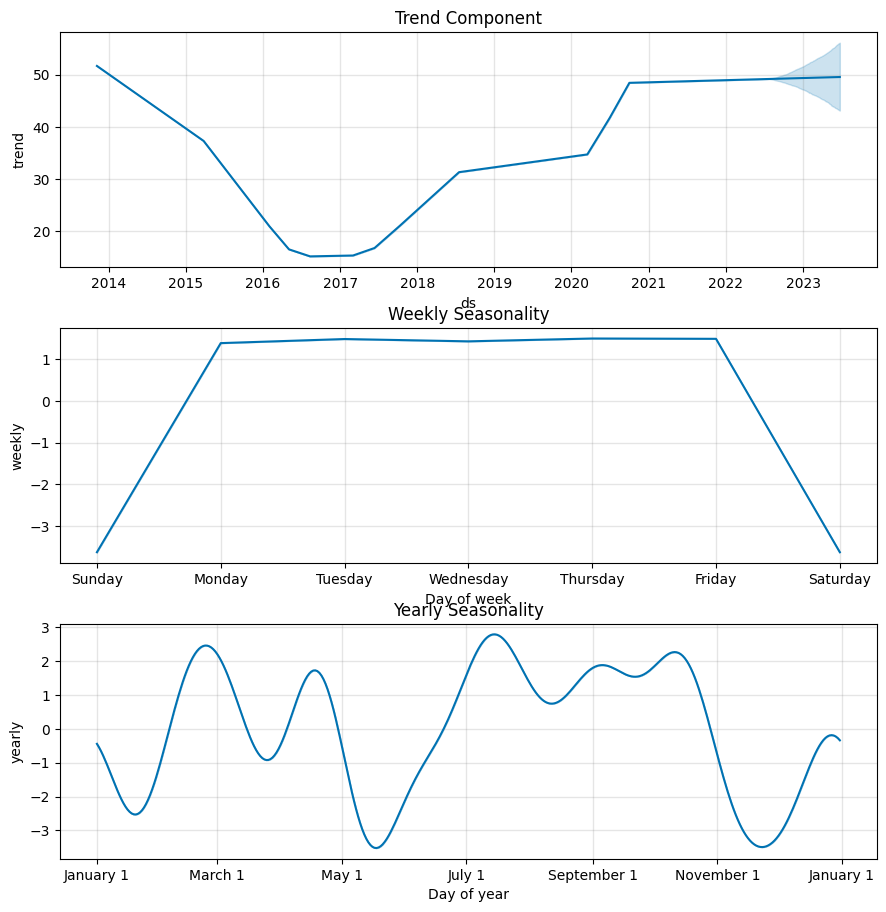

In [36]:

fig = model.plot_components(forecast)
ax = fig.gca()
axes = fig.get_axes()
titles = ['Trend Component', 'Weekly Seasonality', 'Yearly Seasonality']
# Loop through the axes and set custom titles
for ax, title in zip(axes, titles):
    ax.set_title(title)

# Show the plot
plt.show()

#  Forecast Monthly Stock Data


14:05:29 - cmdstanpy - INFO - Chain [1] start processing
14:05:30 - cmdstanpy - INFO - Chain [1] done processing


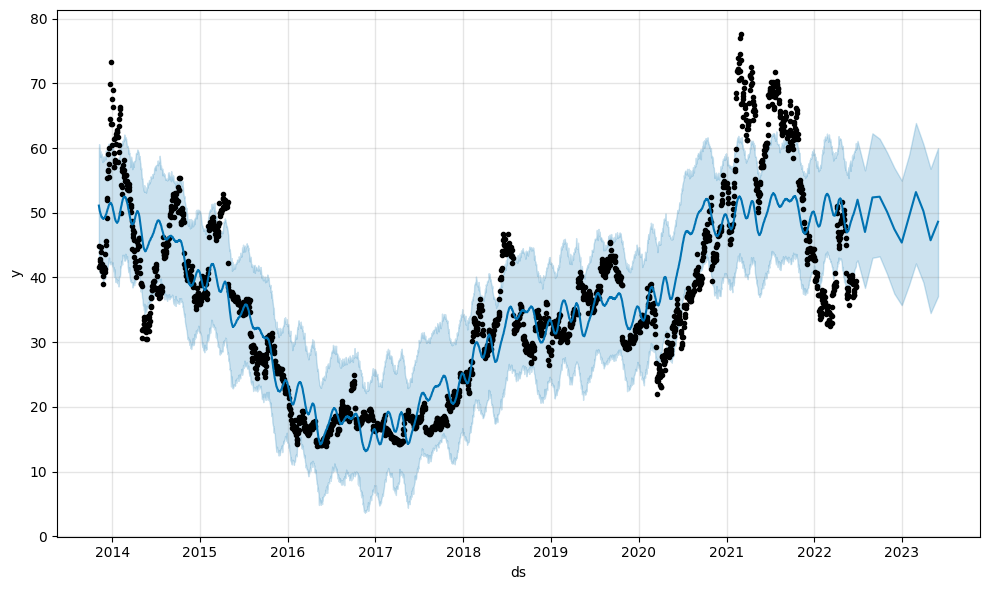

In [51]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.03).fit(df)
future = model.make_future_dataframe(periods=12, freq='M')
fcst = model.predict(future)
fig = model.plot(fcst)



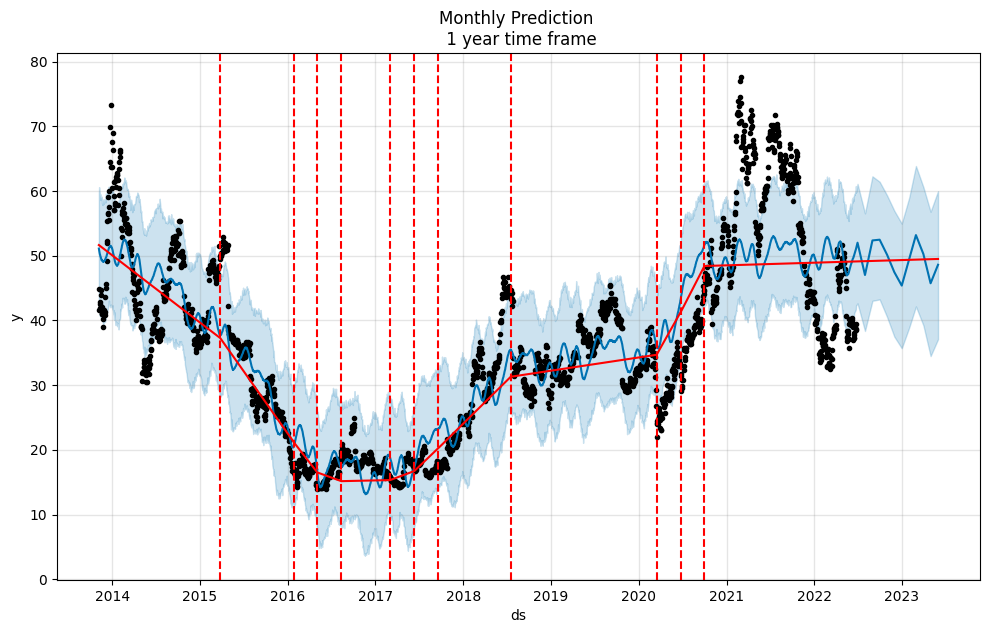

In [54]:
# create the subplots
fig = model.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), model, fcst)
plt.title("Monthly Prediction \n 1 year time frame")
plt.show()

# Task 11: Evaluate the Model

In [56]:
# evaluate the model and print the mean absolute error
y_true = df['y'].values
y_pred = fcst['yhat'][:-12].values
mae = mean_absolute_error(y_true, y_pred)
mae

5.431105241229848

In [58]:
# create the graph for comparison
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['ds'], y=y_true,
                    mode='lines',
                    name='Actual'))
fig.add_trace(go.Scatter(x=df['ds'], y=y_pred,
                    mode='lines',
                    name='Predicted'))
fig['layout'].update(title='Line chart for Actual and Predicted values')
fig.show()